<img src="https://raw.githubusercontent.com/ml-unison/regresion-logistica/master/imagenes/ml-unison.png" width="250">

# Maquinas de vectores de soporte

**Julio Waissman Vianova**

En esta libreta vamos a ver las diferencias entre los diferentes *kernels* así como el efecto del parámetro $C$ en la clasificación por máquinas de vectores de soporte. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('ggplot')
%matplotlib inline



### 1. Generación de las bases de datos con las que vamos a probar


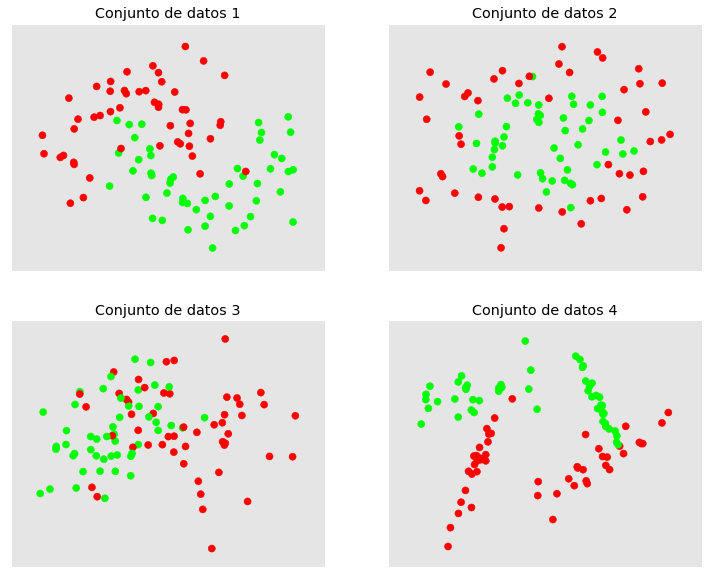

In [2]:
# Conjuntos de datos para probar
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Datos en forma de media luna
X1, y1 = datasets.make_moons(noise=0.3, random_state=0)

# Datos en forma de círculos
X2, y2 = datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

# Datos en forma de regresion lineal
X3, y3 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
# Le agregamos ruido para hacerlos interesantes
rng = np.random.RandomState(2)
X3 += 2 * rng.uniform(size=X3.shape)

X4, y4 = datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2
)

# Los conjuntos de datos irdenados como una lista de pares ordenados
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

# Y los grafiacamos para verlos
figure = plt.figure(figsize=(10, 10))
cm_escala = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

for (i, ds) in enumerate(datasets):

    # Selecciona los valores del conjunto de datos y los escala
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Grafica
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_escala)
    ax.set_xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    ax.set_ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(f"Conjunto de datos {i+1}")
figure.subplots_adjust(left=.02, right=.98)    
plt.show()



### 2. Probando diferentes kernels en los conjuntos de datos





Base de datos 1


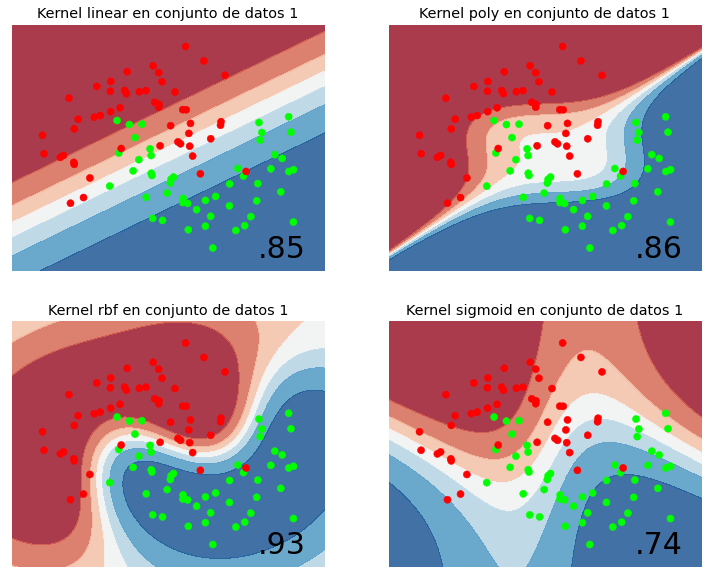



Base de datos 2


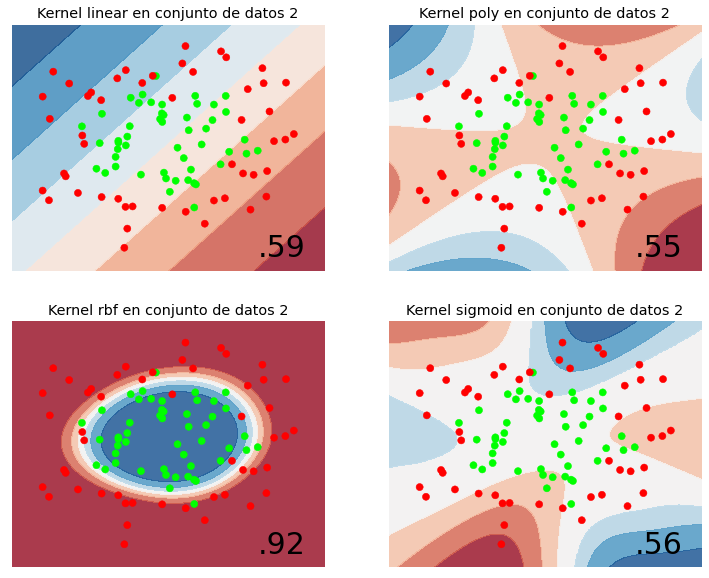



Base de datos 3


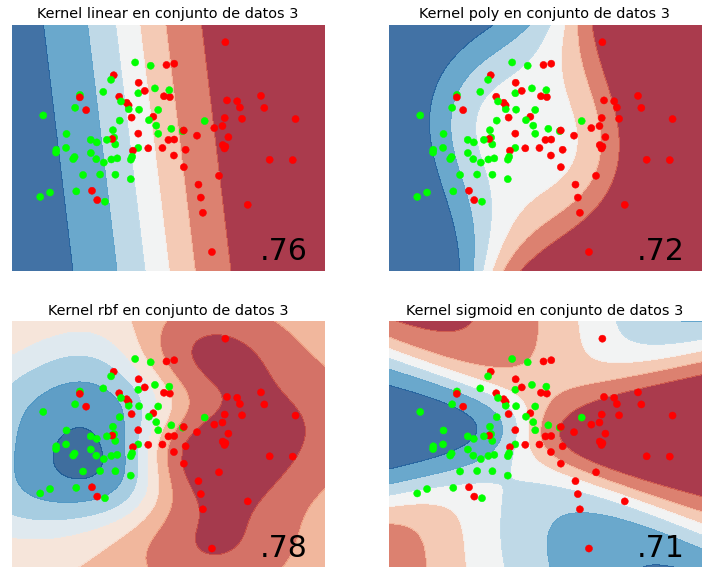



Base de datos 4


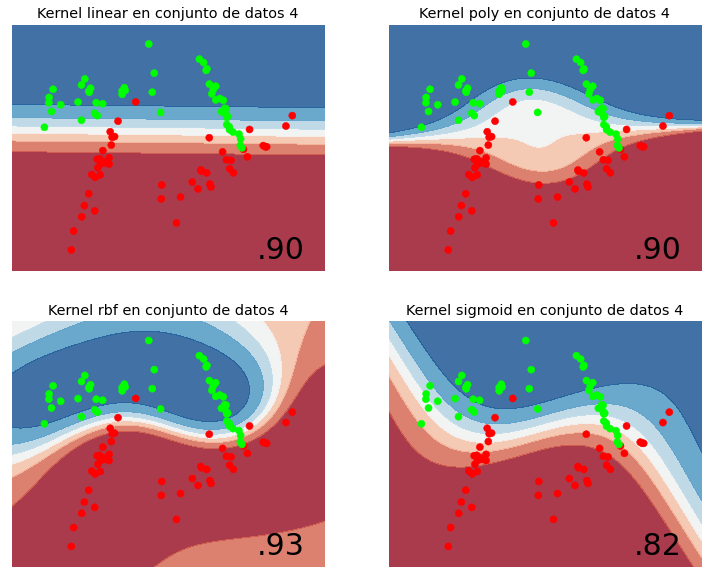

In [3]:
## Vamos a escoger una escala de colores de alto contraste
cm = plt.cm.RdBu

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, kernel) in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=1, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

### 3. Que pasa cuando aumenta $C$ en el clasificador lineal



Base de datos 1


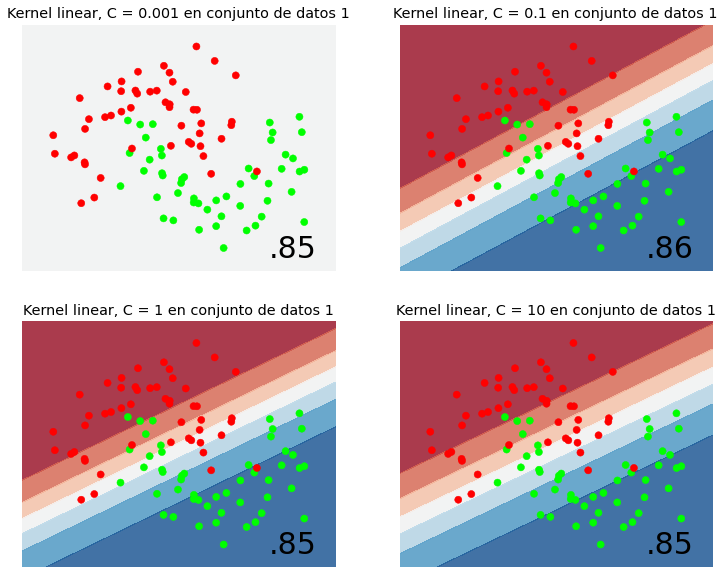



Base de datos 2


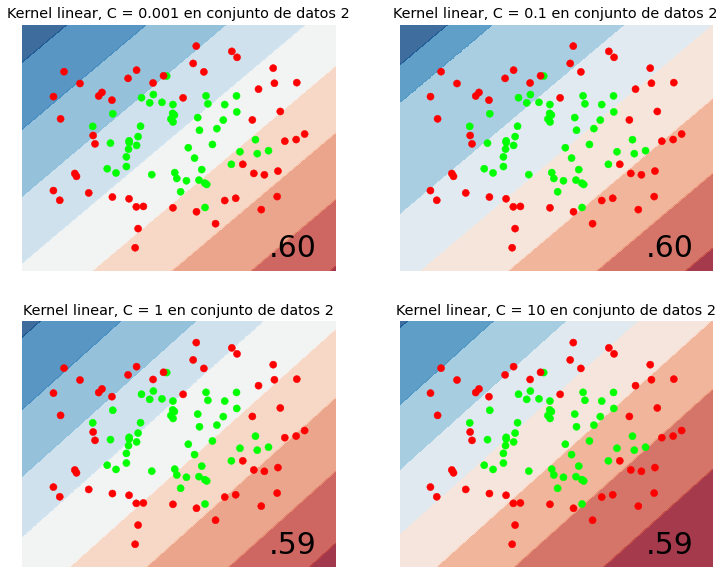



Base de datos 3


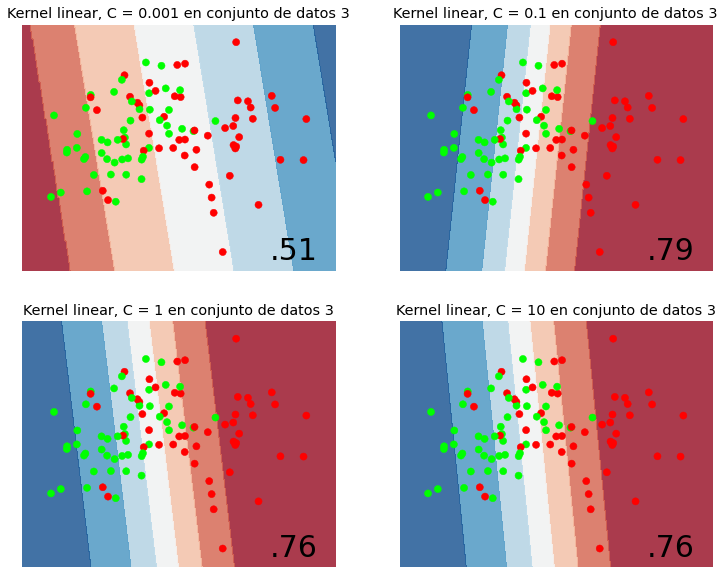



Base de datos 4


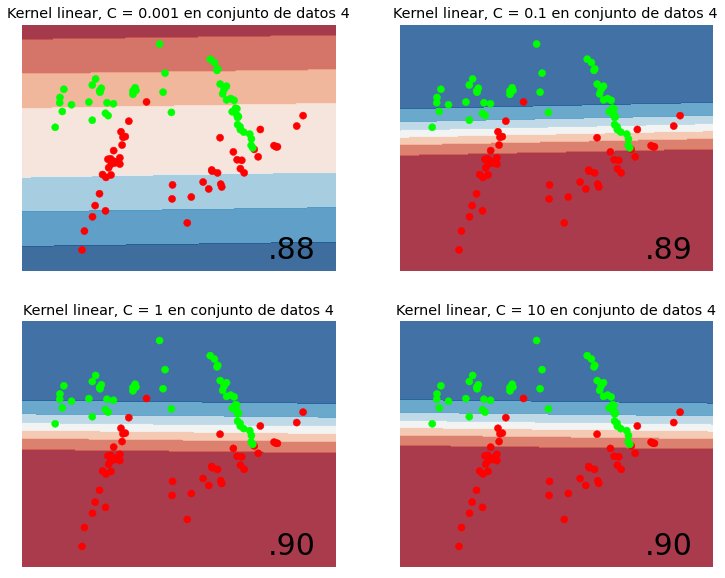

In [4]:
kernel = 'linear'

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, C) in enumerate([.001, .1, 1, 10]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"Kernel {kernel}, C = {C} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 1. Prueba modificar los valores de C para los diferentes kernels manteniendo el resto de los parámetros por default. Comenta aquí mismo tus conclusiones.**



Kernel poly
Base de datos 1


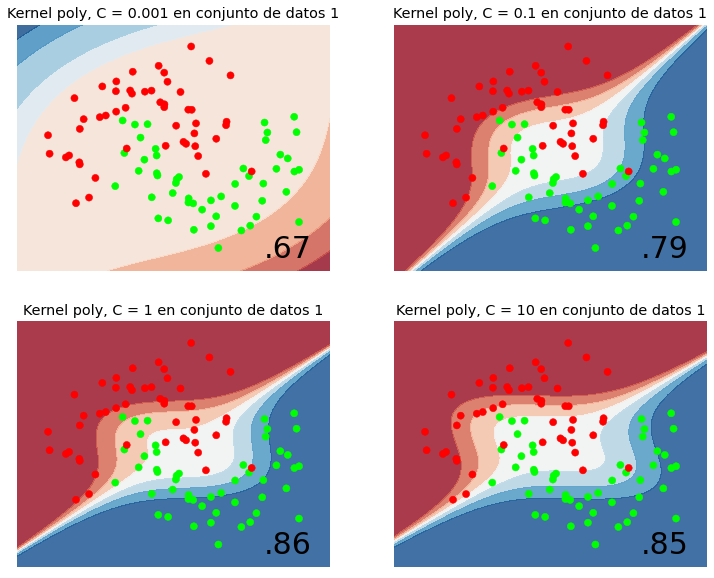

Base de datos 2


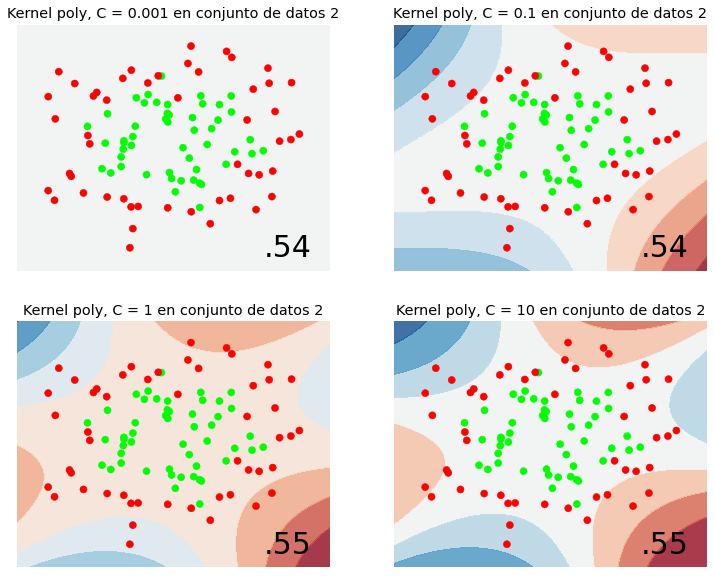

Base de datos 3


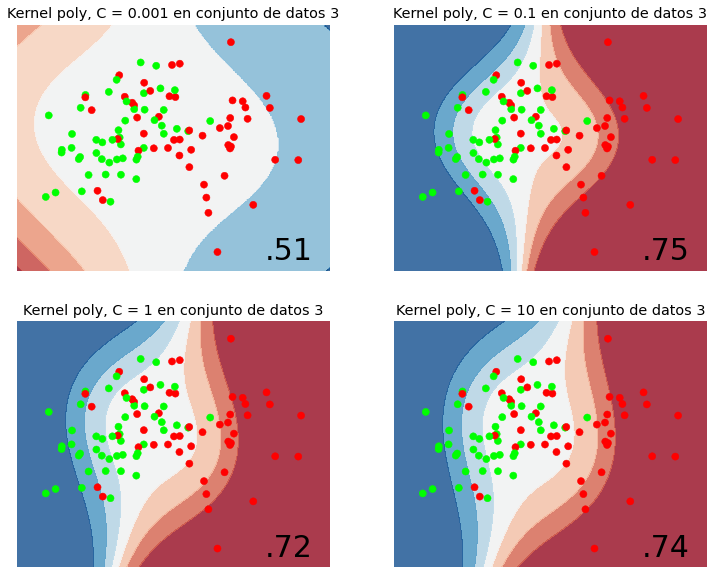

Base de datos 4


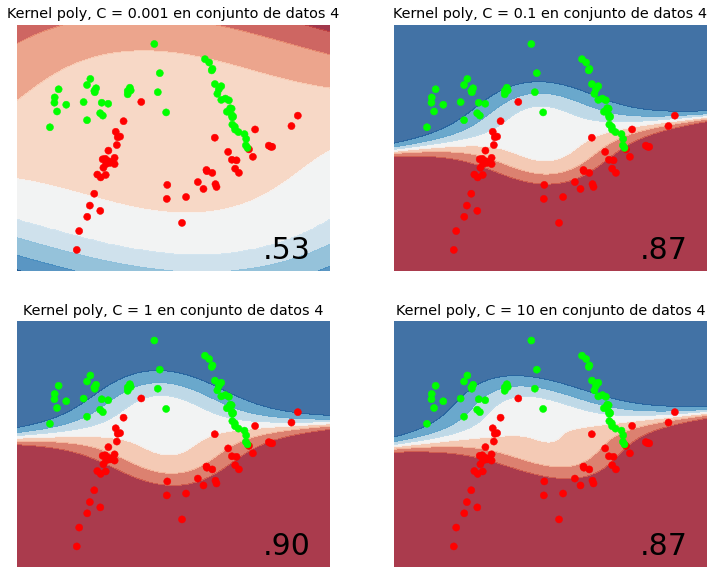



Kernel rbf
Base de datos 1


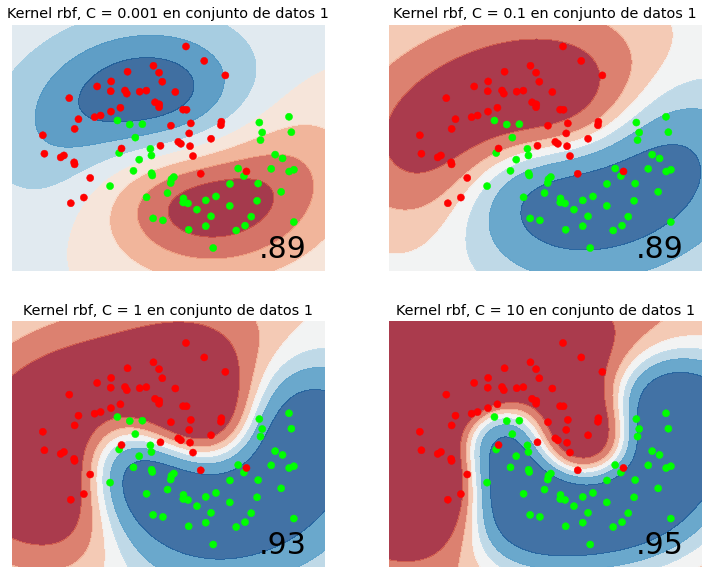

Base de datos 2


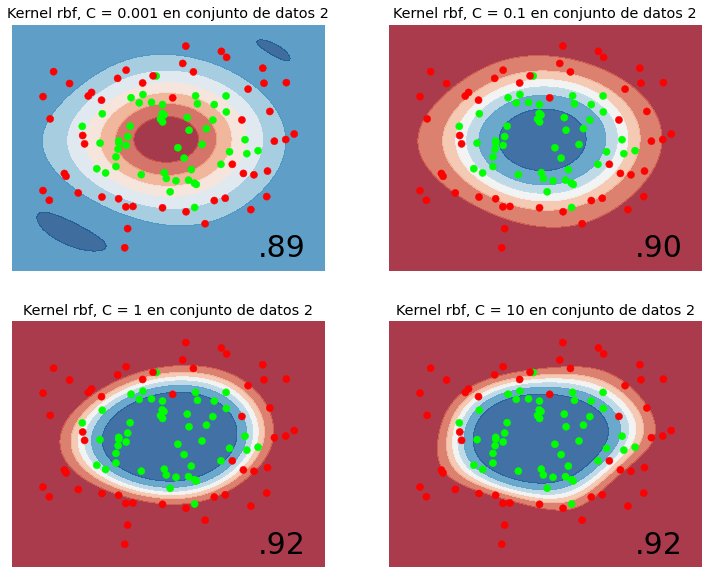

Base de datos 3


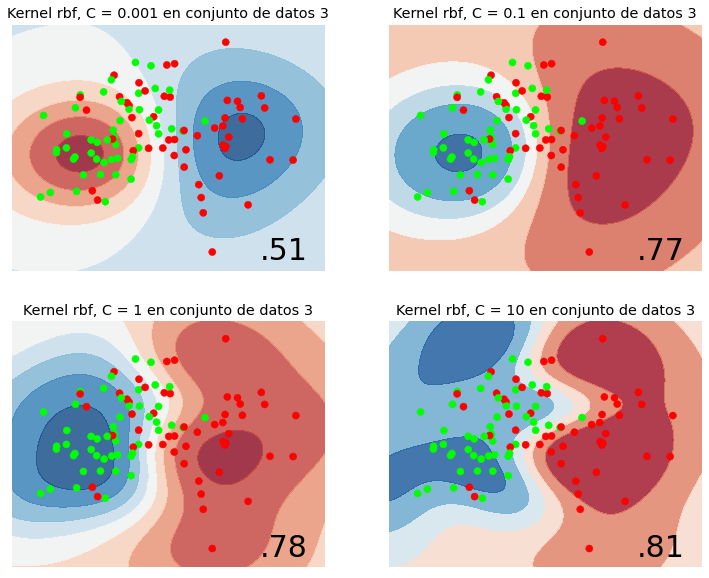

Base de datos 4


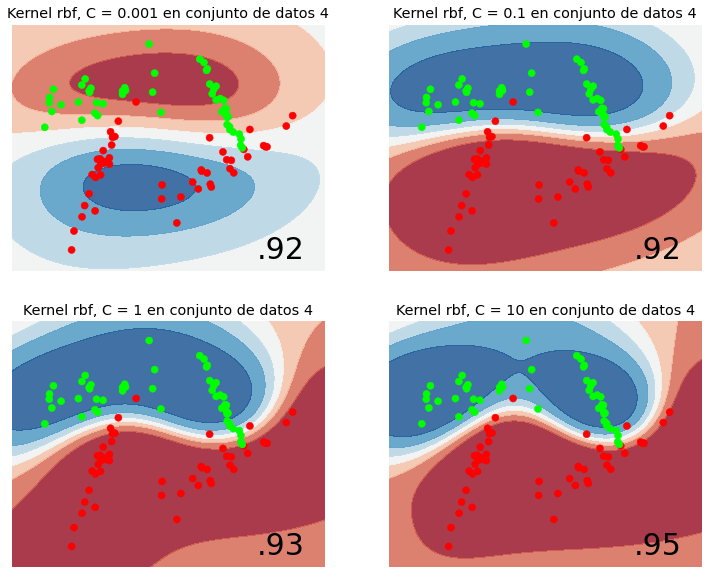



Kernel sigmoid
Base de datos 1


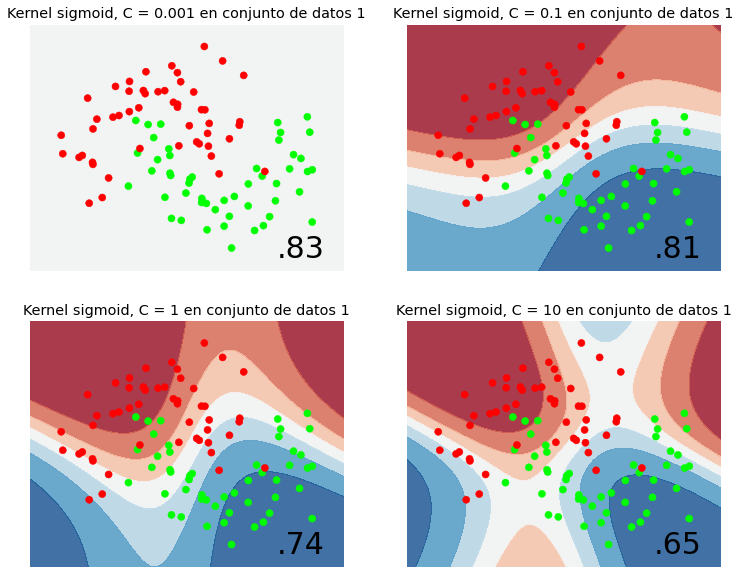

Base de datos 2


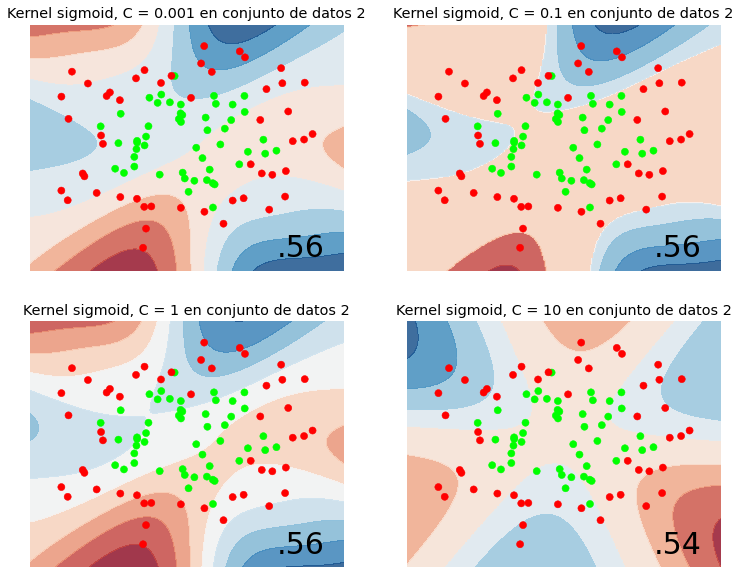

Base de datos 3


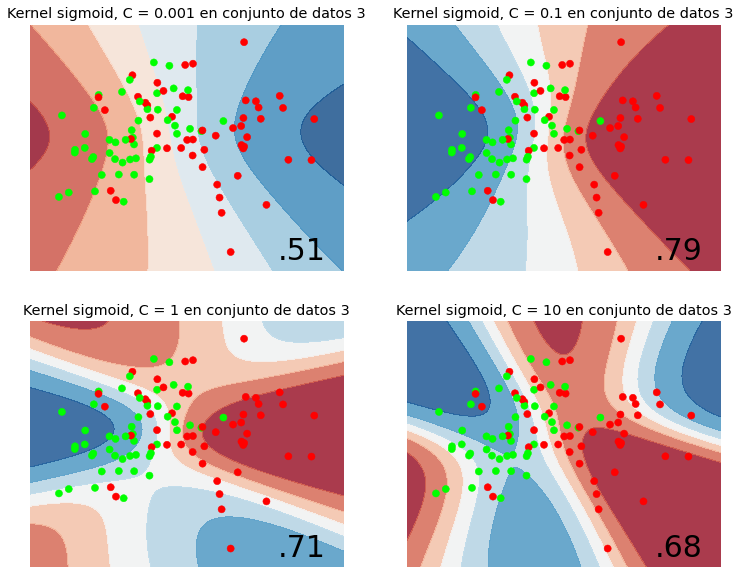

Base de datos 4


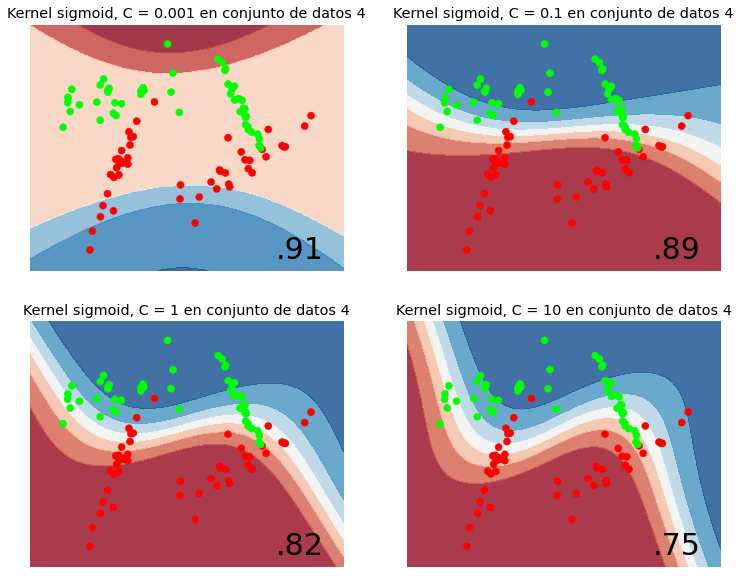

In [5]:
non_linear_kernels = ['poly', 'rbf', 'sigmoid']

# Por cada kernel
for kernel in non_linear_kernels:
    print(f"\n\nKernel {kernel}")
    
    # Una figura por cada conjunto de datos
    for (cual, ds) in enumerate(datasets):

        print(f"Base de datos {cual + 1}")
        figure = plt.figure(figsize=(10, 10))

        # Escalar y selecciona valores de entrenamiento y prueba
        X, y = ds
        X = StandardScaler().fit_transform(X)

        # Meshgrid para pintar las regiones
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                             np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

        # Por cada clasificador
        for (i, C) in enumerate([.001, .1, 1, 10]):
            ax = plt.subplot(2, 2, i + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"Kernel {kernel}, C = {C} en conjunto de datos {cual + 1}")

        figure.subplots_adjust(left=.02, right=.98)
        plt.show()

Para el kernel lineal, pareciera que la recta que divide a los datos, conforme se va aumentando el parámetro C, a partir de cierto punto ya no cambia mucho, sólo ajusta la probabilidad con la que se predicen las entradas. Sin embargo en el resto de kernels sí se puede ver un mayor impacto en el score, pues logra mejorar considerablemente el score mientras aumenta la C, llegando en algunos casos al sobreaprendizaje.

### 4. La variable `gamma` para los kernel `rbf`, `poly` y `sigmoid`

**Ejercicio 2. Escribe aquí mismo que significa la variable `gamma` ($\gamma$) para los diferentes kernels (puedes poner la ecuación si es necesario)**

1. Para `rbf`: La ecuación del kernel es $\exp(-\gamma \|x-x'\|^2)$

2. Para `poly`: La ecuación del kernel es $(\gamma\langle x,x'\rangle+r)^d$

3. Para `sigmoid`: La ecuación del kernel es $\tanh(\gamma\langle x,x'\rangle+r)$

En `poly` y `sigmoid` representa el peso que tiene el factor del producto interno, y en el caso del `rbf` el peso del cuadrado de la norma.




Base de datos 1


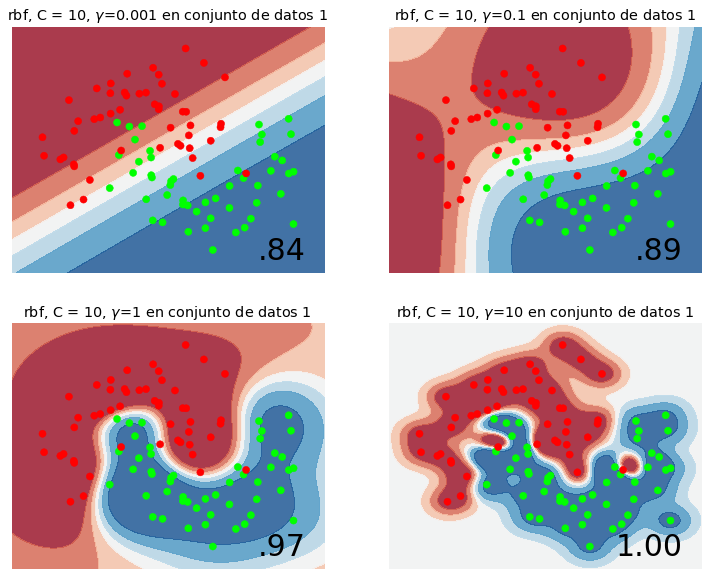



Base de datos 2


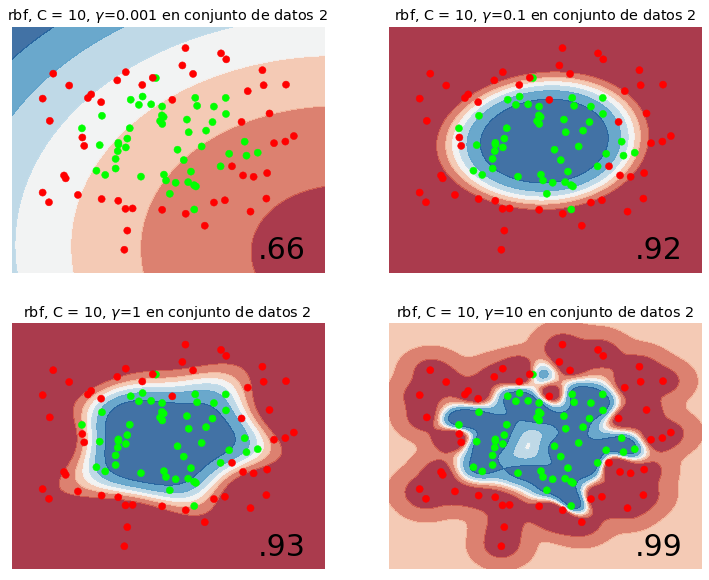



Base de datos 3


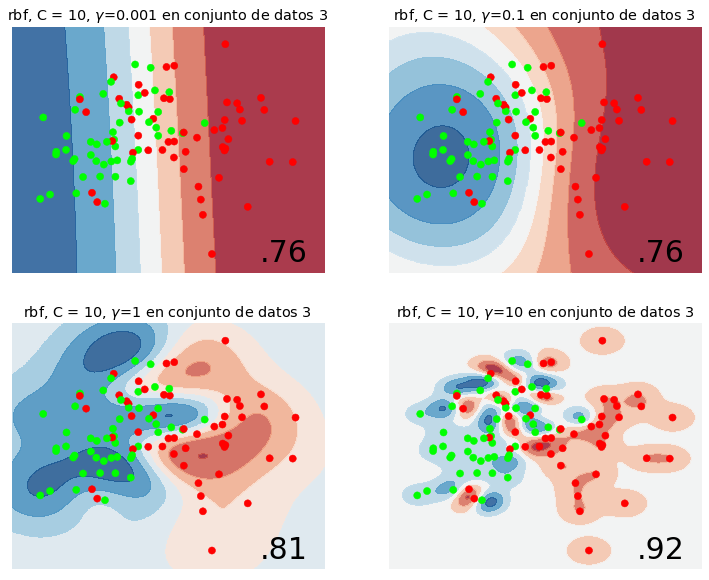



Base de datos 4


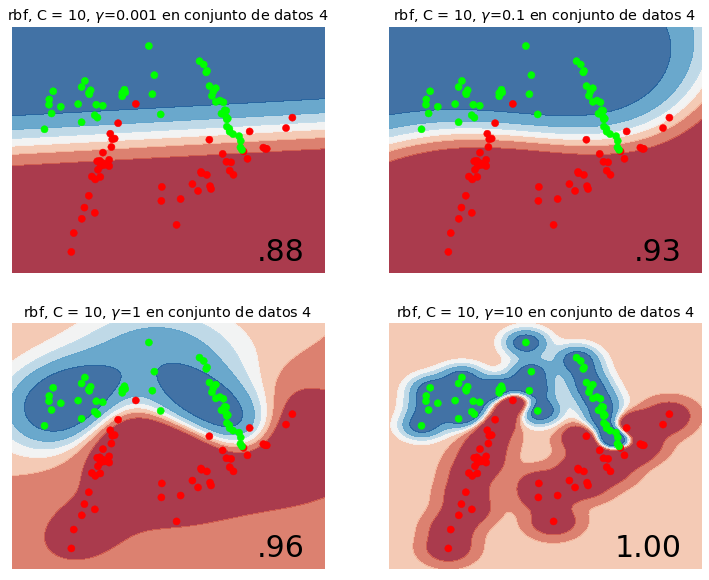

In [6]:
kernel = 'rbf'
C = 10

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(10, 10))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, gamma) in enumerate([.001, .1, 1, 10]):
        ax = plt.subplot(2, 2, i + 1)

        # Entrenamiento
        clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        # Clasifica cada punto en el meshgrid
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)

        # Asigna un contorno de probabilidad
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Grafica los datos
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
        # Arregla axes y pone titulos
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        plt.title(f"{kernel}, C = {C}, $\gamma$={gamma} en conjunto de datos {cual + 1}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

**Ejercicio 3: Encuentra la mejor combiación de $C$ y $\gamma$ para los 3 tipos de *kernel*, explica en cada uno en que afecta la $\gamma$ y porque tiene una influencia tan diferente.**

Probando en los tres dataset con el kernel `rbf`

Kernel rbf en dataset 1


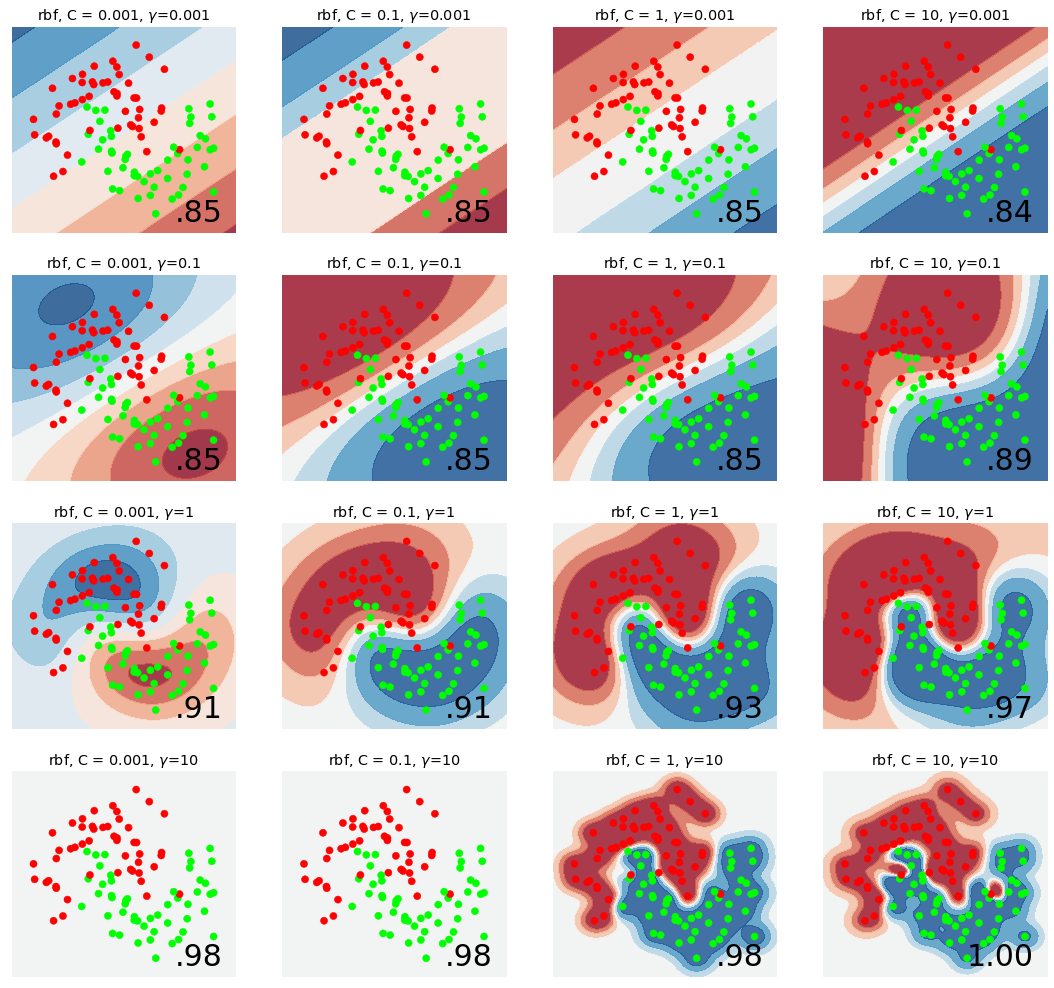

Kernel rbf en dataset 2


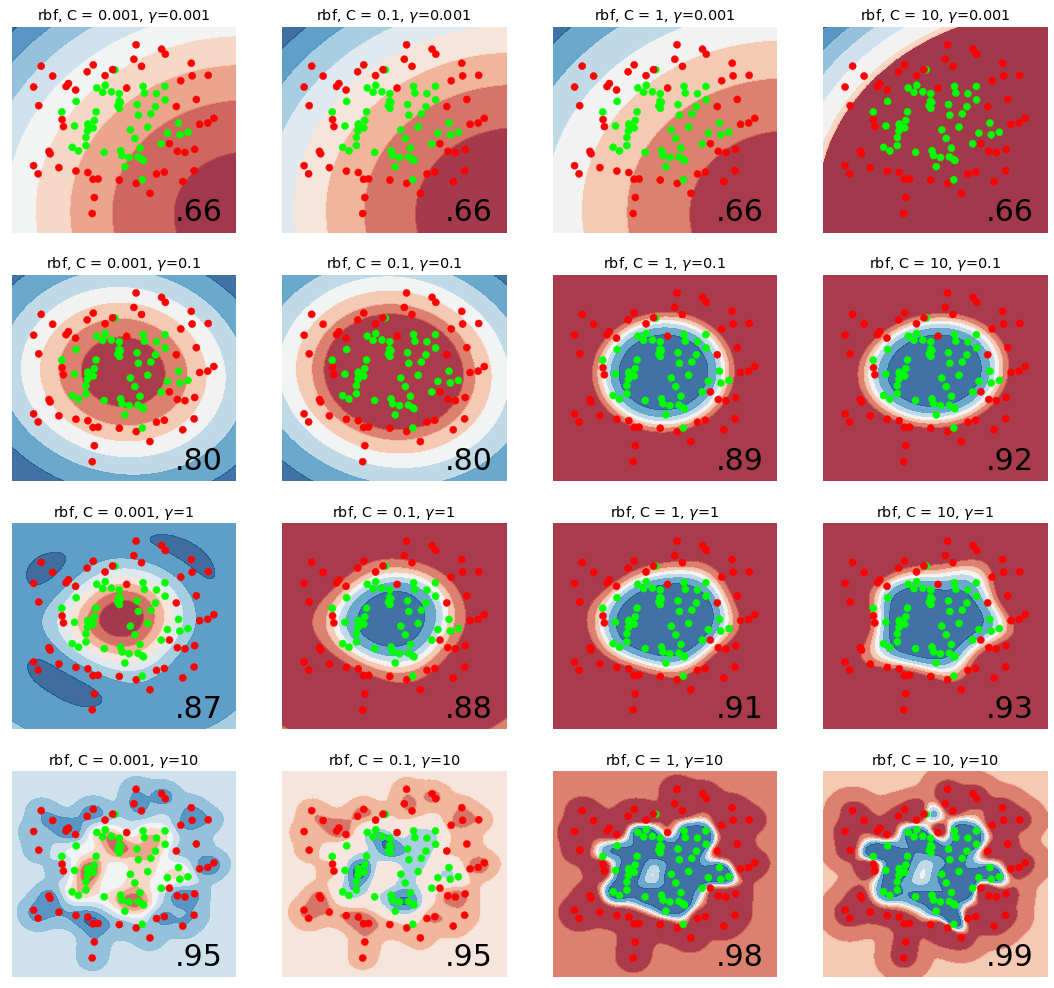

Kernel rbf en dataset 3


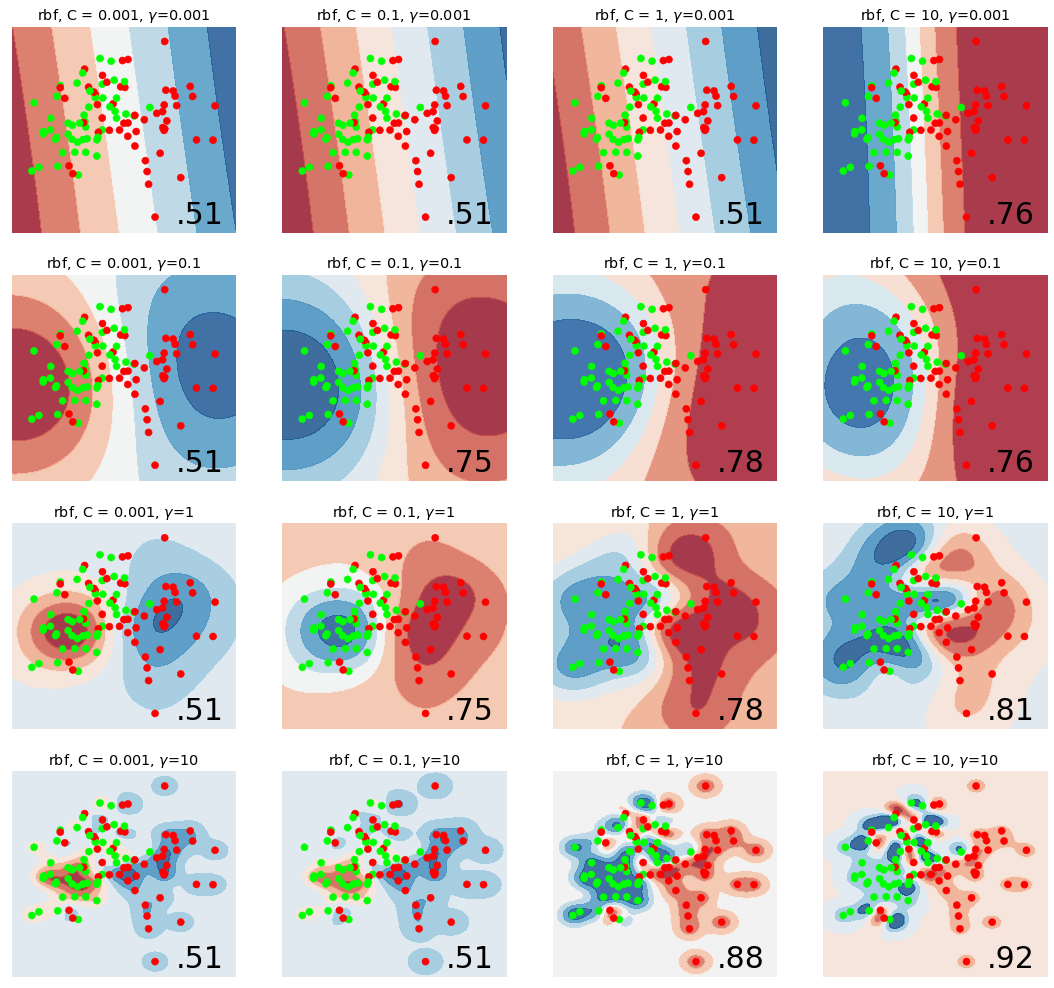

Kernel rbf en dataset 4


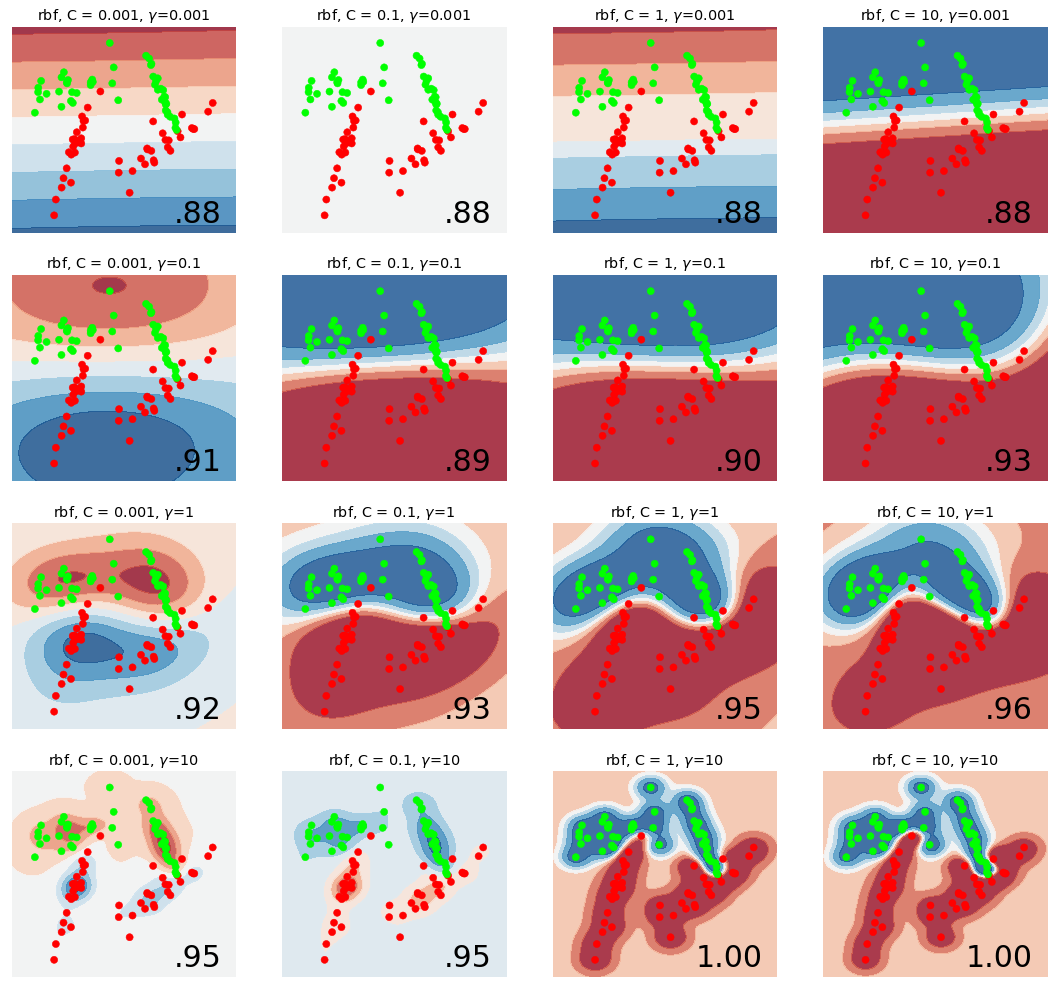

In [7]:
kernel = 'rbf'

for cual_ds, ds in enumerate(datasets):

    print(f'Kernel {kernel} en dataset {cual_ds + 1}')
    figure = plt.figure(figsize=(15, 17.5))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Iterando combinaciones gamma / C
    for i, gamma in enumerate([.001, .1, 1, 10]):
        for j, C in enumerate([.001, .1, 1, 10]):

            ax = plt.subplot(4, 4, 4 * i + j + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"{kernel}, C = {C}, $\gamma$={gamma}")
    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


Conforme va aumentando el parámetro $\gamma$, el clasificador encierra más a los datos del entrenamiento, generaliza menos. Por lo general el clasificador se ve que funciona mejor con los valores de C=1 y gamma=1.

Probando en los tres dataset con el kernel `poly`

Kernel poly en dataset 1


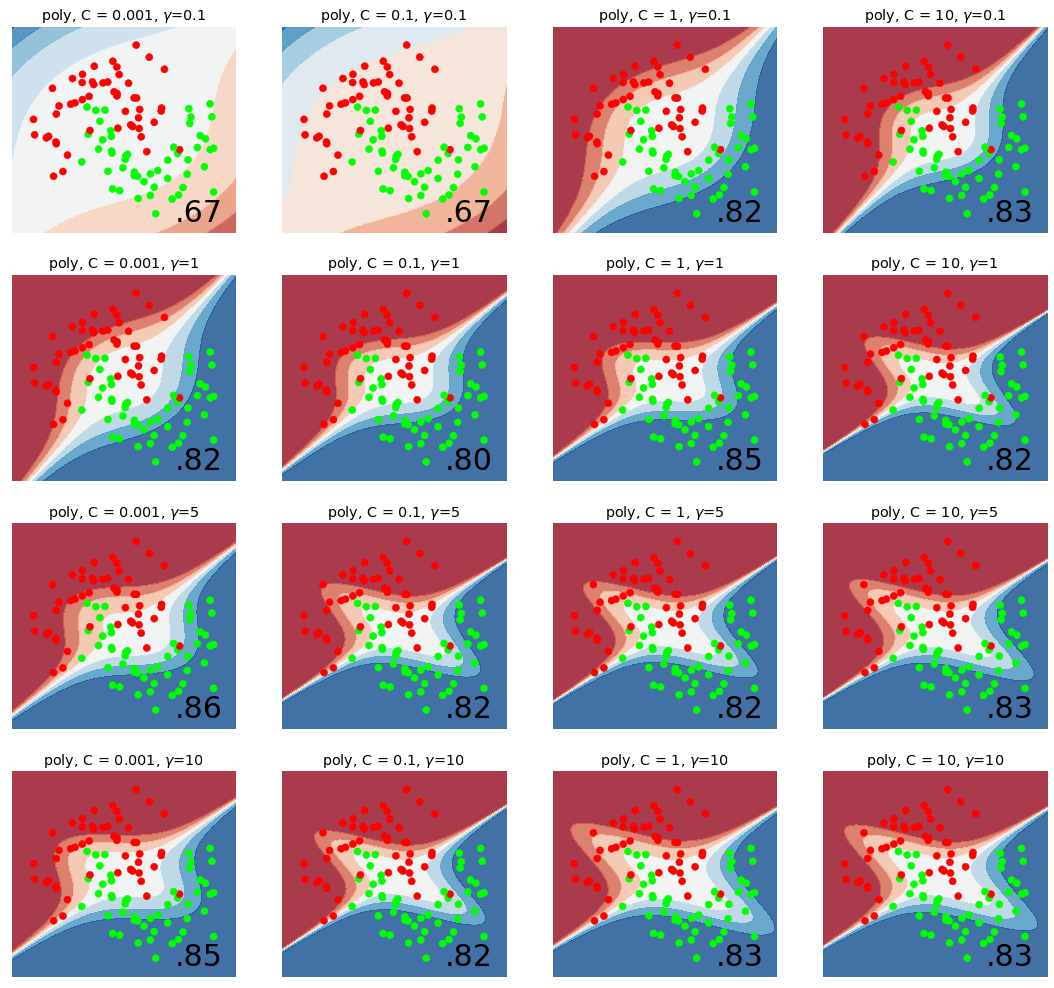

Kernel poly en dataset 2


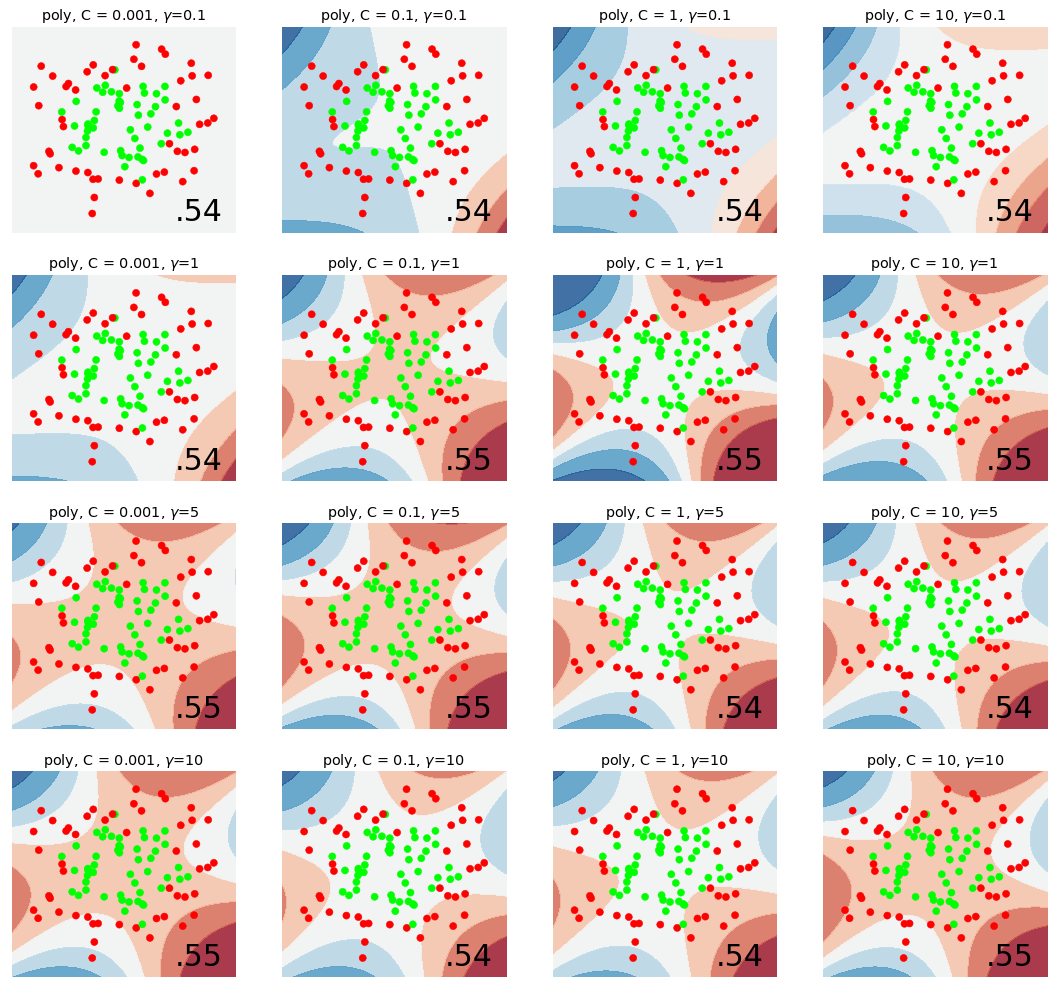

Kernel poly en dataset 3


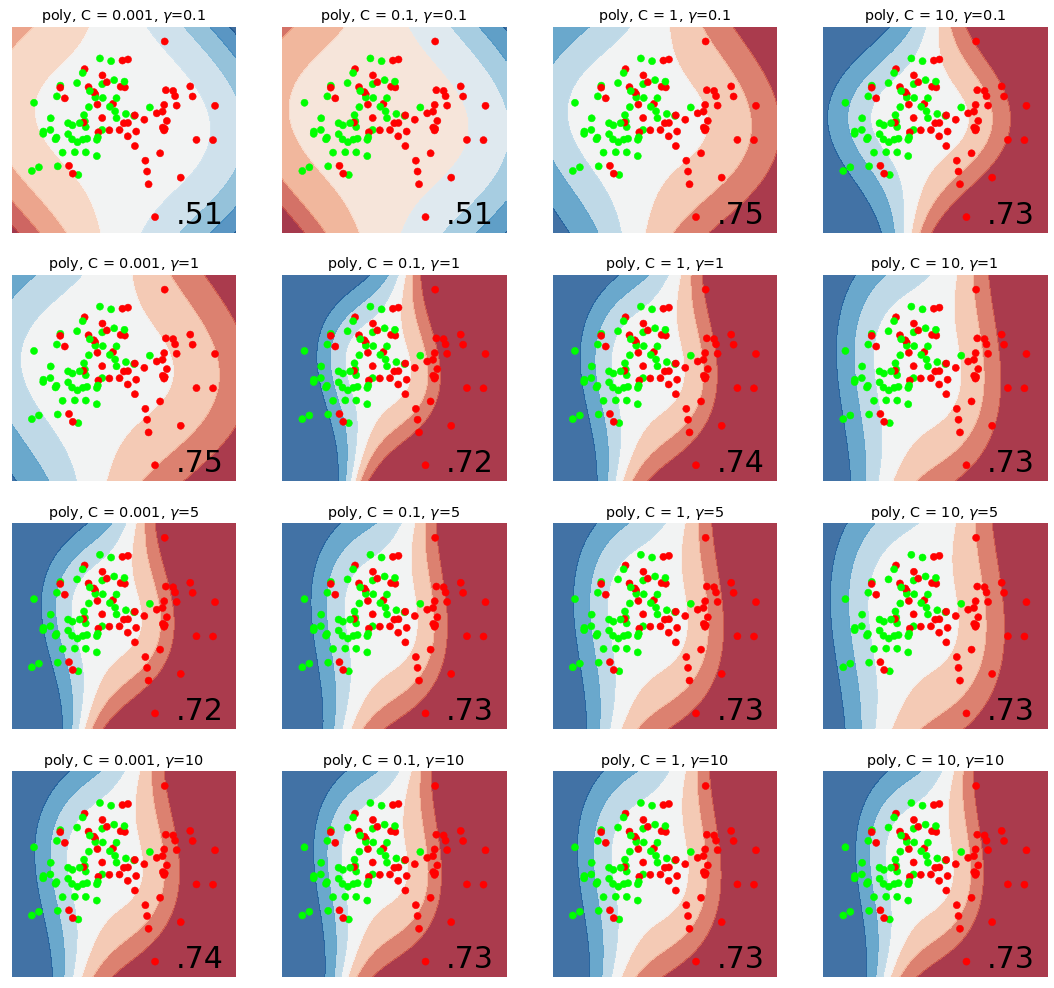

Kernel poly en dataset 4


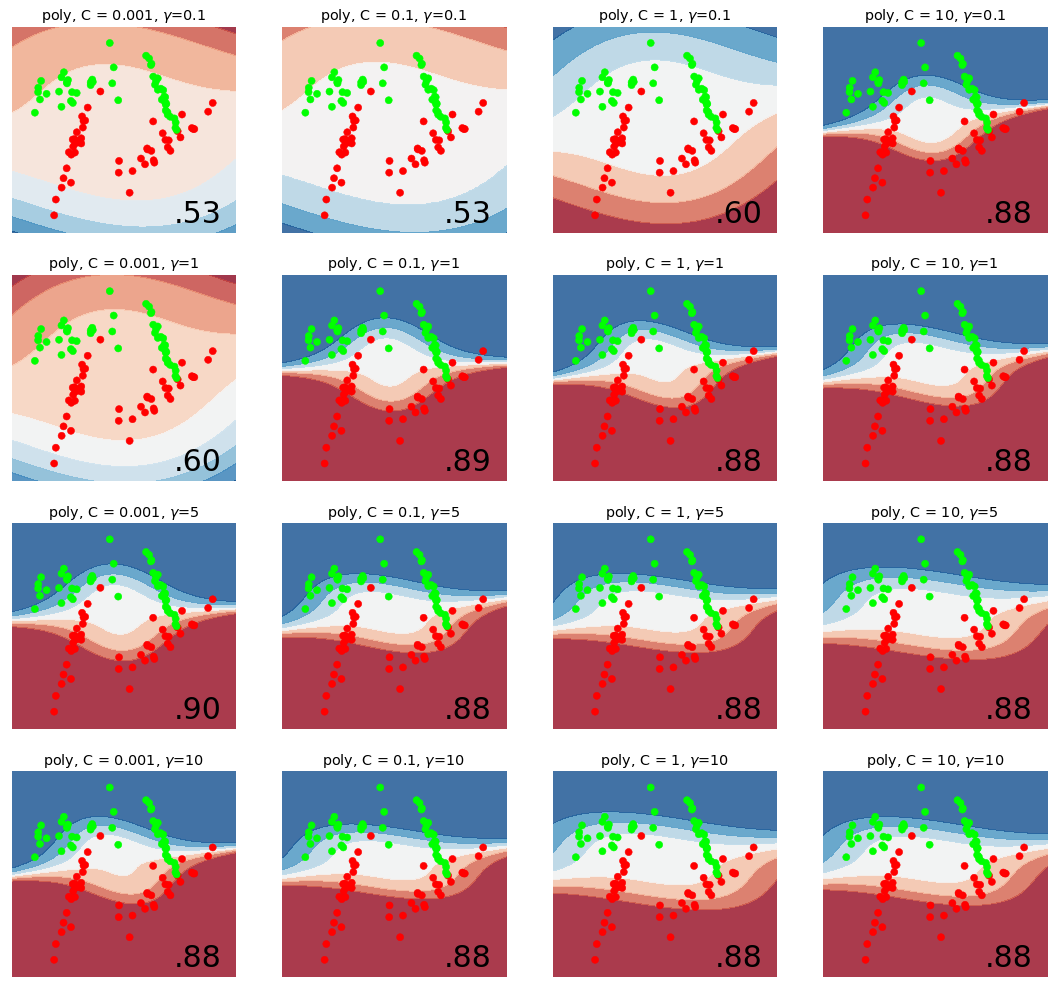

In [8]:
kernel = 'poly'

for cual_ds, ds in enumerate(datasets):

    print(f'Kernel {kernel} en dataset {cual_ds + 1}')
    figure = plt.figure(figsize=(15, 17.5))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Iterando combinaciones gamma / C
    for i, gamma in enumerate([.1, 1, 5, 10]):
        for j, C in enumerate([.001, .1, 1, 10]):

            ax = plt.subplot(4, 4, 4 * i + j + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"{kernel}, C = {C}, $\gamma$={gamma}")
    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


Parece que hace algo parecido a en el rbf, pero no se podría decir con certeza debido a que este kernel no funciona muy bien con los datasets. Los valores con los que mejor trabaja son parecidos a los del rbf, gamma=1, C=1, a veces con gamma=5.

Probando en los tres dataset con el kernel `sigmoid`

Kernel sigmoid en dataset 1


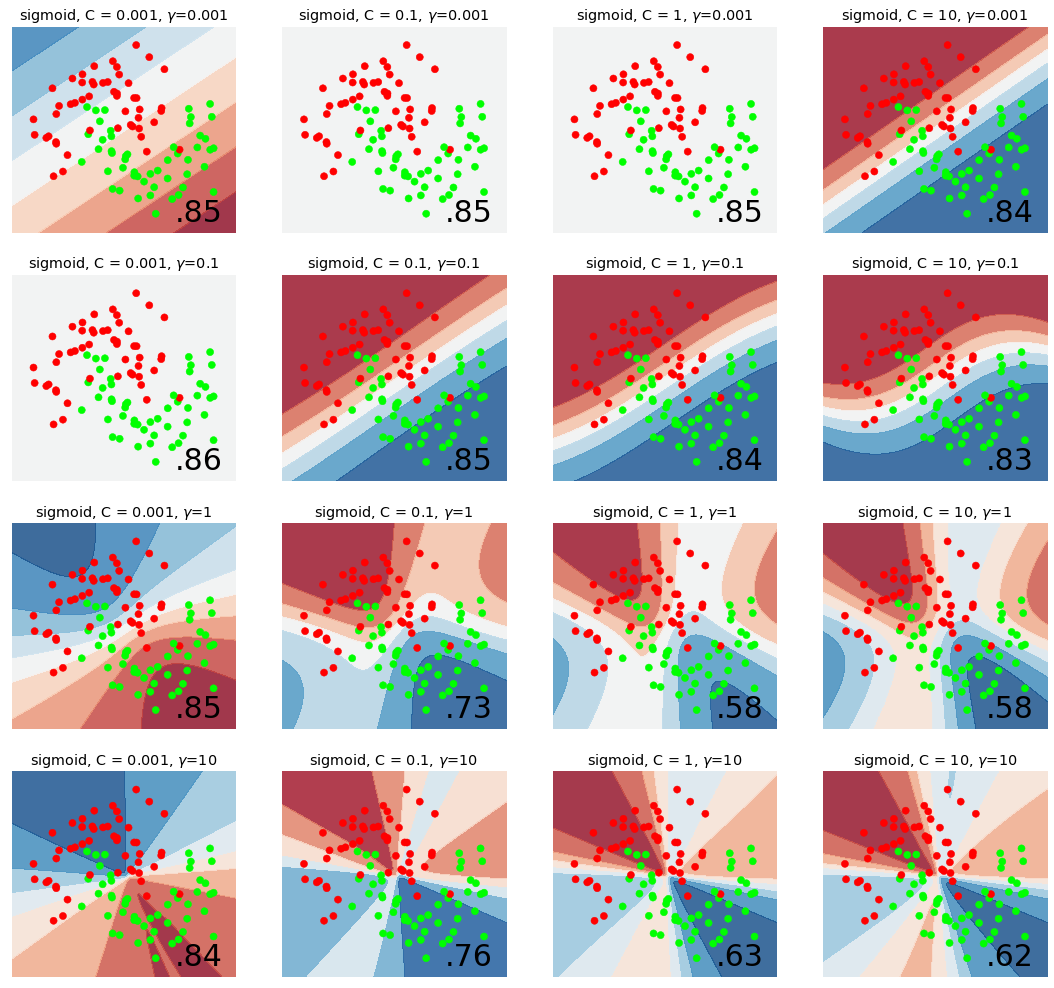

Kernel sigmoid en dataset 2


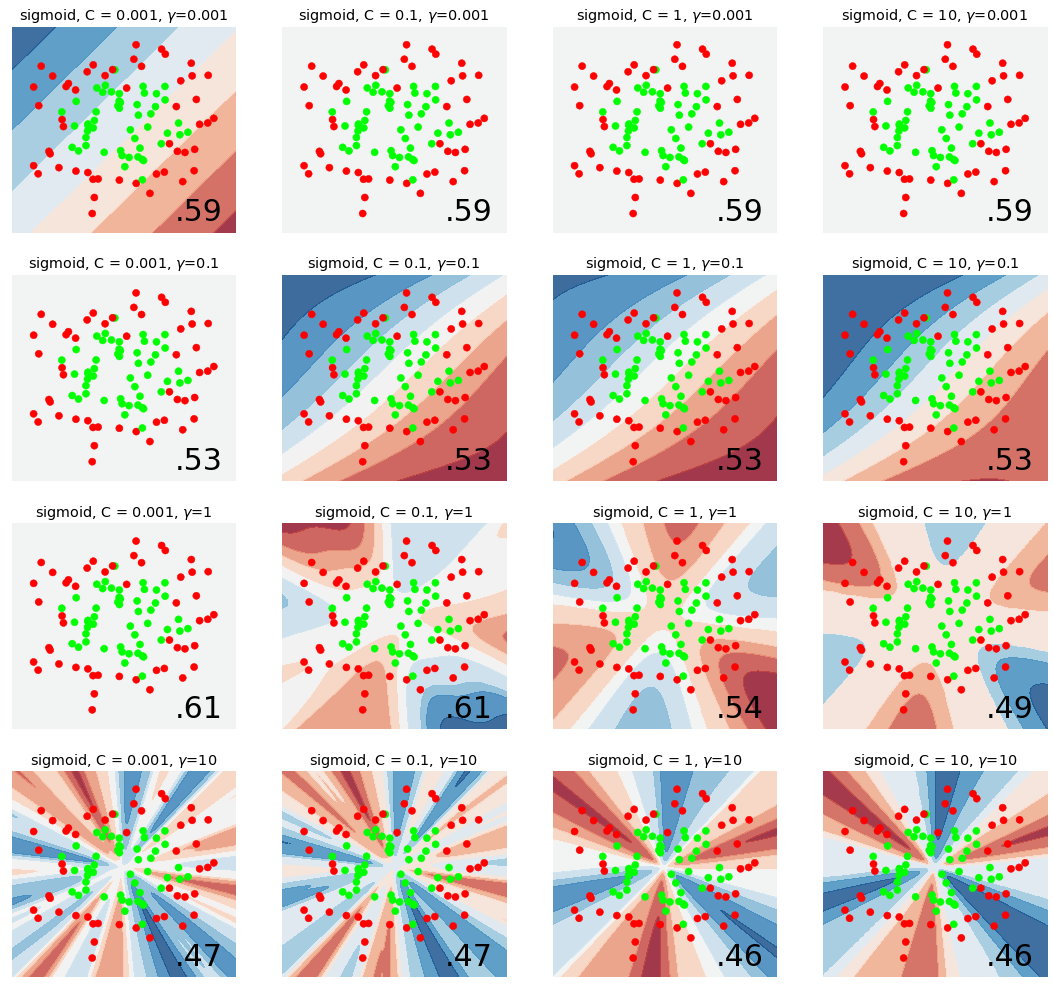

Kernel sigmoid en dataset 3


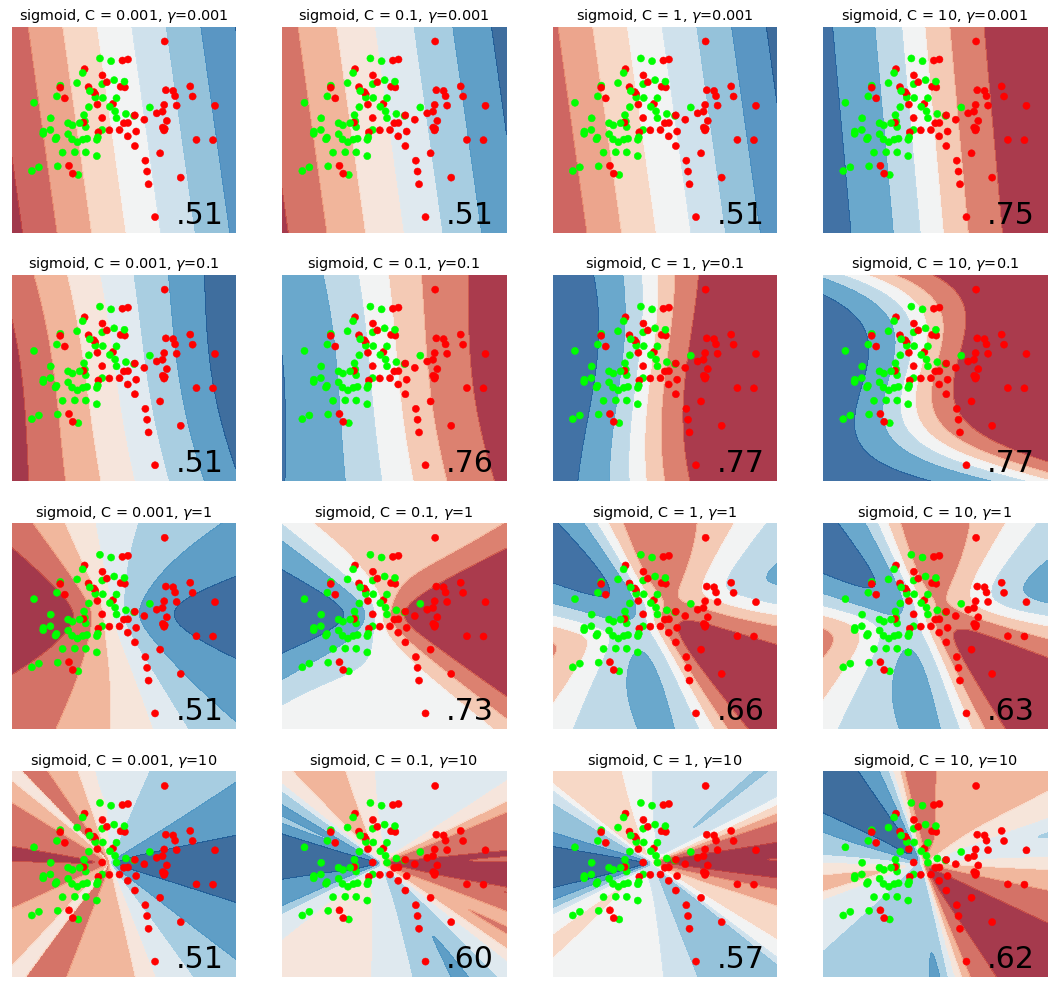

Kernel sigmoid en dataset 4


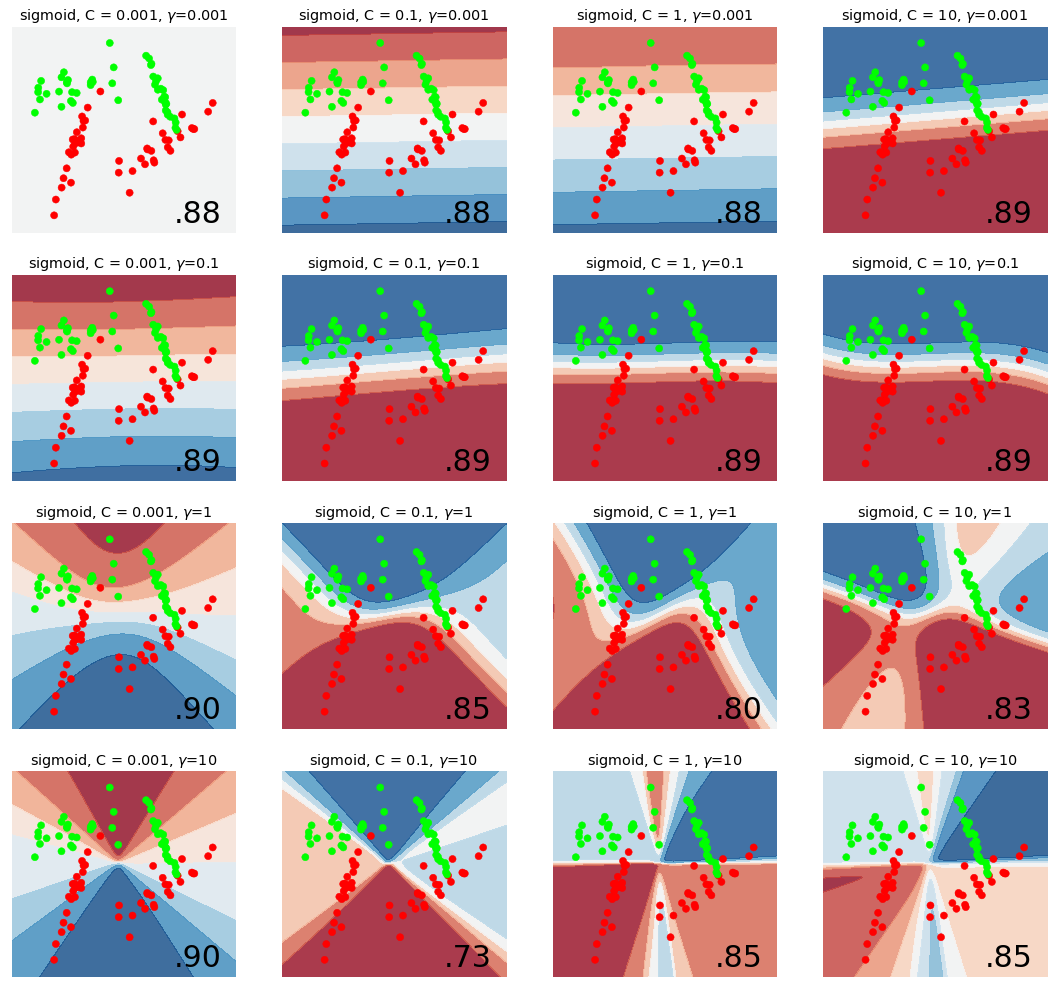

In [9]:
kernel = 'sigmoid'

for cual_ds, ds in enumerate(datasets):

    print(f'Kernel {kernel} en dataset {cual_ds + 1}')
    figure = plt.figure(figsize=(15, 17.5))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)

    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Iterando combinaciones gamma / C
    for i, gamma in enumerate([.001, .1, 1, 10]):
        for j, C in enumerate([.001, .1, 1, 10]):

            ax = plt.subplot(4, 4, 4 * i + j + 1)

            # Entrenamiento
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            clf.fit(X, y)
            score = clf.score(X, y)

            # Clasifica cada punto en el meshgrid
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Asigna un contorno de probabilidad
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            # Grafica los datos
            ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
            # Arregla axes y pone titulos
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=30, horizontalalignment='right')
            plt.title(f"{kernel}, C = {C}, $\gamma$={gamma}")
    figure.subplots_adjust(left=.02, right=.98)
    plt.show()


En este kernel está un poco más claro cómo afecta, ya que al subir el valor de gamma, el clasificador va tomando mayor complejidad: comienza como un clasificador lineal y va complicando más su forma. gamma=0.1 suele funcionar mejor con C=1.

**Ejercicio 4: Como viste, existe mucho código repetido en los incisos 2, 3 y 4, por lo que se puede generalizar una parte con una función. Intenta generalizarlo** 

In [10]:
def grafica_con_contour(ax, xx, yy, clf, score, cm):
    
    # Clasifica cada punto en el meshgrid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Asigna un contorno de probabilidad
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Grafica los datos
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_escala, s=50)
    # Arregla axes y pone titulos
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=30, horizontalalignment='right')
    
# De esta forma cada vez sólo se utiliza

# grafica_con_contour(ax, xx, yy, clf, score, cm)


**Exta bono: ¿Que significa el parámetro `coef0` para los *kernels* `sigmoid` y `poly`? ¿Cómo afeca en la clasificación?

El `coef0` es el parámetro $r$, que marca el sesgo en la función lineal que se le aplica al producto interno lineal, antes de aplicar $\tanh$ o elevar a un exponente.



Base de datos 1


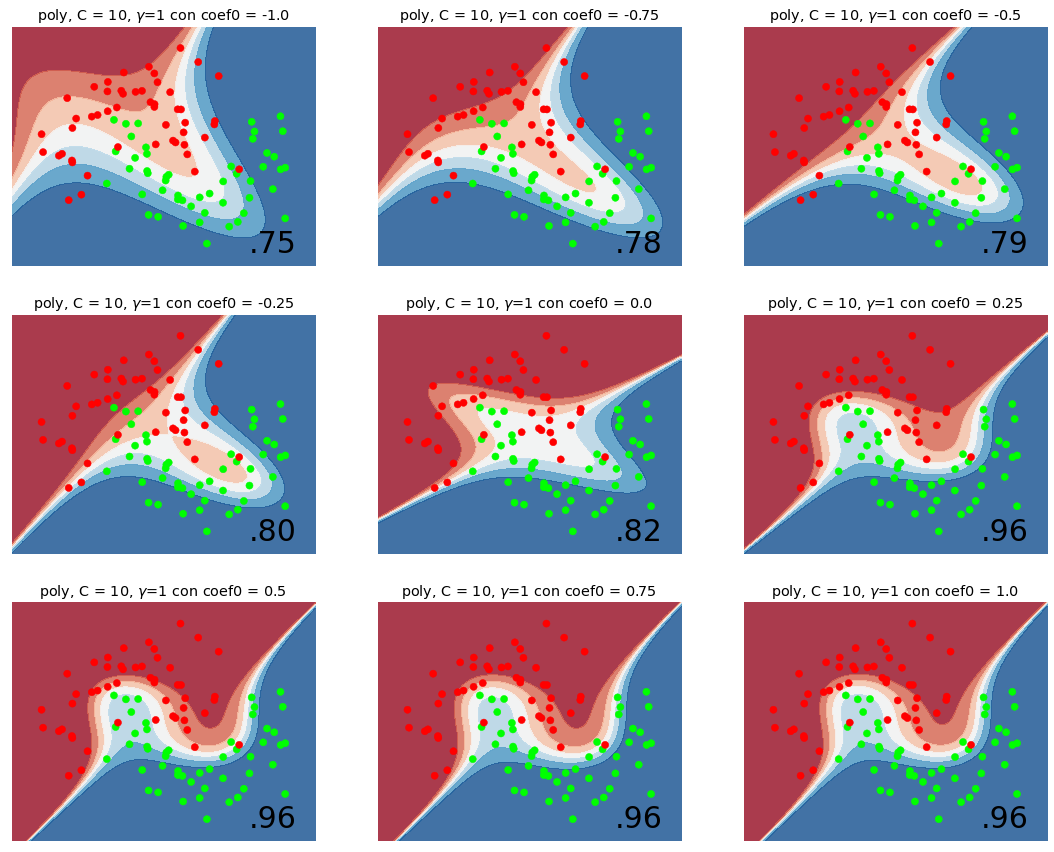



Base de datos 2


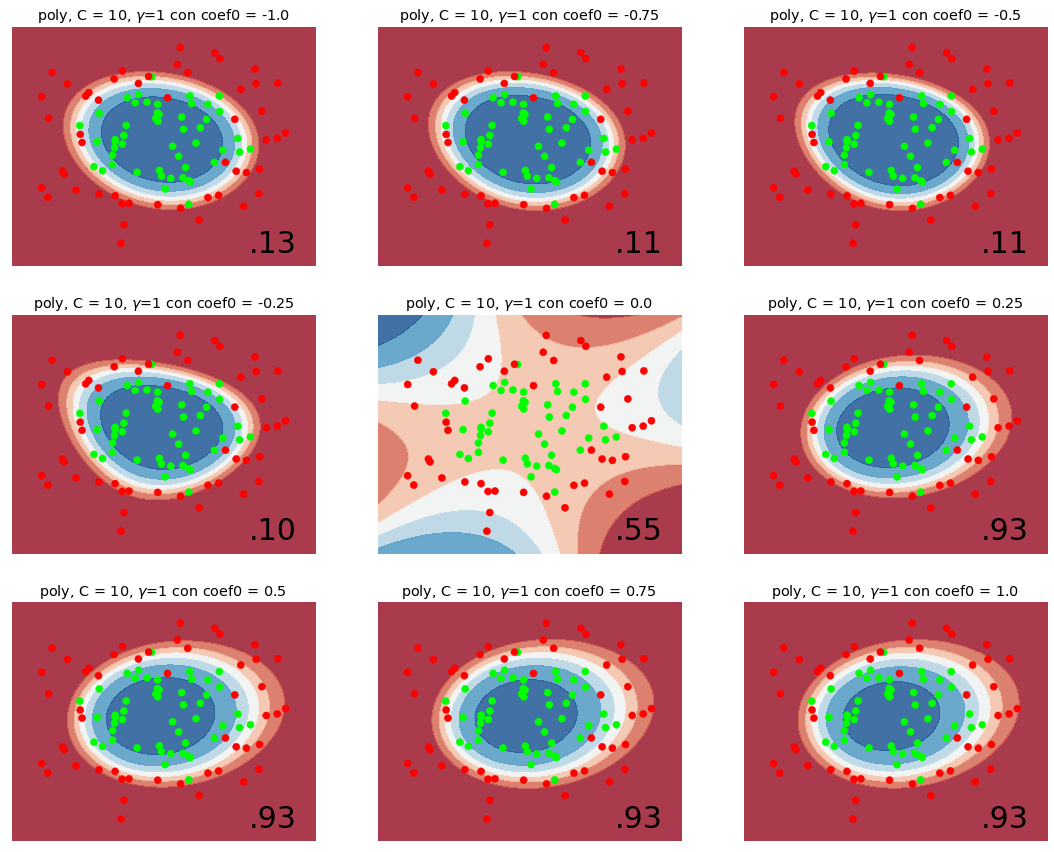



Base de datos 3


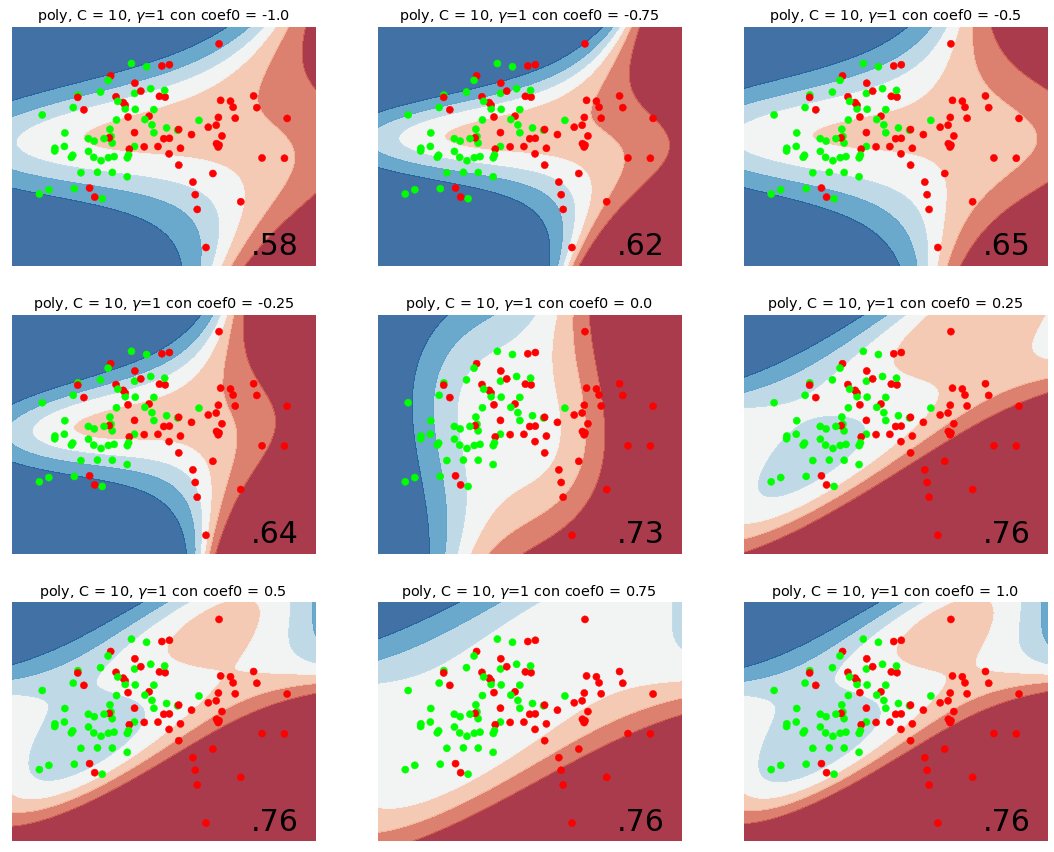



Base de datos 4


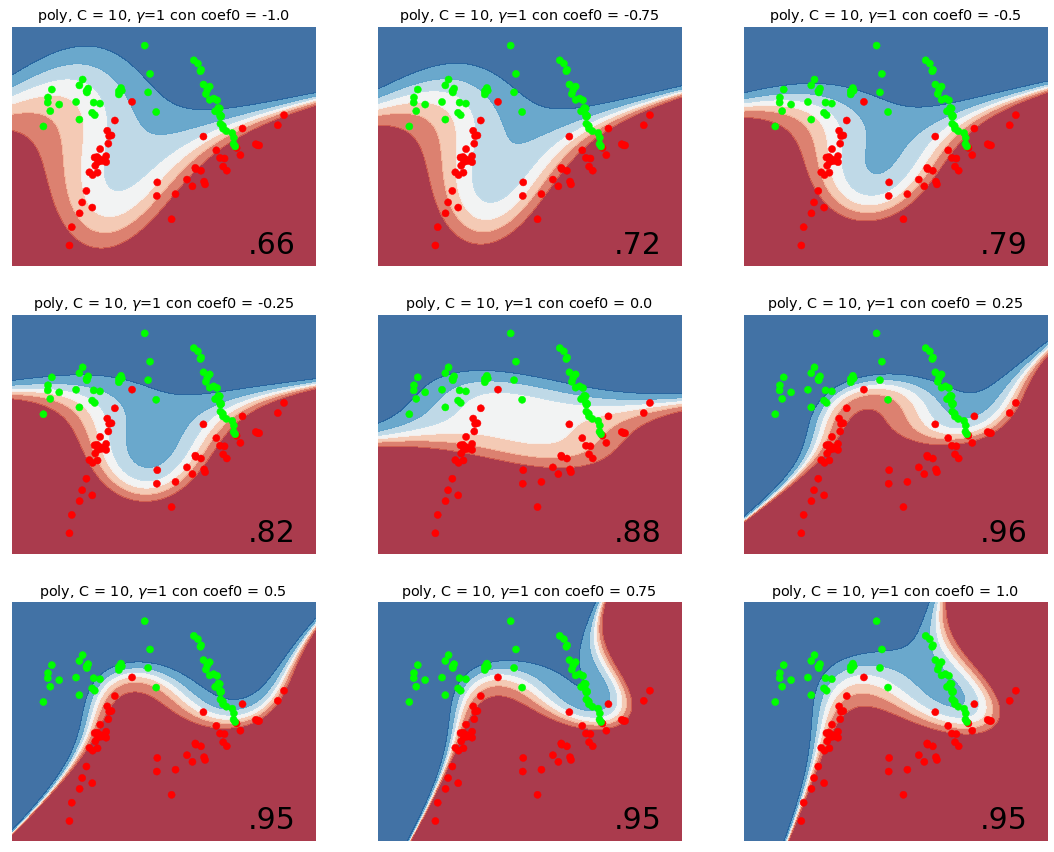

In [19]:
kernel = 'poly'
C = 10
gamma = 1

# Una figura por cada conjunto de datos
for (cual, ds) in enumerate(datasets):
    
    print(f"\n\nBase de datos {cual + 1}")
    figure = plt.figure(figsize=(15, 15))

    # Escalar y selecciona valores de entrenamiento y prueba
    X, y = ds
    X = StandardScaler().fit_transform(X)
 
    # Meshgrid para pintar las regiones
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, 0.02),
                         np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, 0.02))

    # Por cada clasificador
    for (i, coef0) in enumerate(np.linspace(-1, 1, num=9)):
        ax = plt.subplot(3, 3, i + 1)

        clf = SVC(kernel=kernel, C=C, gamma=gamma, coef0=coef0, probability=True)
        clf.fit(X, y)
        score = clf.score(X, y)

        grafica_con_contour(ax, xx, yy, clf, score, cm)
        
        plt.title(f"{kernel}, C = {C}, $\gamma$={gamma} con coef0 = {coef0}")

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

En términos generales, mejora el accuracy dentro del dataset de pruebas: pariculariza más.